---
title: "Computer Science to Machine Learning - An intuitive understanding of ML for coders (Part 1)"
author: "Jax Bulbrook"
date: "2023-08-21"
categories: [tutorial]
---

# Summary
This tutorial is meant to give an intuitive explanation of machine learning for those that are already familiar with computer science, specifically Python and OOP. If you aren't, I would highly suggest learning to code before learning AI, as it will be very challenging otherwise. Check out the amazing [100 Days of Python Course](https://100daysofpython.dev/) to do so. But this mini-course assumes no previous knowledge of the field. In fact, I was in the same position roughly a year ago, having gotten interested in ML with the release of ChatGPT. I couldn't possibly imagine how they are able to program so many different outputs, or how they teach a computer to do it for them. Roughly a year later and my path has deviated several times, as there are so many resources out there it's hard to keep track. My list of links, videos, and books to read is over 500, and that is unsustainable for someone trying to transition from CS to the newly popular (and high paying) ML. I'm not at all good at math or theory, I prefer using code as an example, but in some cases there is a need to understand the underlying theory, for which I apologize in advance.

# Course outline
I am going to be documenting the various ideas on the journey to a career in Machine Learning, so this will probably be ongoing, but for now here is what you will learn:

1. An intuitive understanding of a neural network (this post)
2. Implementing a simple digit classifier with PyTorch
3. Behind the scenes: How Backpropogation works
4. A guide to the confusing aspects of the Transformer
5. How Stable Diffusion works
6. Tips to make your model better (dropout, layer norm, nonlinearity, etc)

# What is a neural network?
Neural networks are simply used to refer to a complex mathematical expression. It is a way to represent any function with a series of "parameters". For now, you can think of it as a black box, where you pass in information and get out the correct information. This neural network can have it's complexity increased or decreased, depending on the complexity of the relationship it needs to model. The reason it's so special, and the reason everyone cares so much about it, is that its a *universal function approximator*. So it could graph something as simple as x^2 or sin(x), yes, but it can also be expanded to anything you can put into a series of numbers.  
  
So what if you need to figure out if an image is a cat or a dog? Just convert each pixel to a number going from 0 (white) to 1 (black), and feed that in, to get the answer. We could manually figure this out, by writing some incredibly long function with thousands of different variables, but mathematicians would very quickly get tired of that. And how do you figure out what the numbers are? It makes no intuitive sense to us, but computers don't need intuition. The beauty of a neural network is that you can give it a bunch of data it needs to classify along with the result, and it will figure out how to do that. It does need some way of figuring out if it's right or wrong, though, or else it would just spit out random answers forever and think it's getting everything write.   
   
But how does this magical function approximator work? It's actually modelled after our own brains, which may be why it can now do many of the same things we can do. Here is a simple graph, one that can classify someone as male or female given their height and weight: ![A simple neural net](simple-nn.png)
It looks a bit confusing at first, but it's actually very simple. You start with an input layer, with your two numbers you are feeding it (weight and height). There is no need to transform these from our language (words) computer language (numbers) since they already are! Then, you have what's called a hidden layer. This goes in between the input and output layer, and it is used to give the model a bit more context. If we were only allowed to have one layer, then the weight and height would have to have some number that directly turns them into gender (1 or 0). It's a bit more complicated than that, so you give the model one (or many) extra layers to process the information a bit better. One is enough, but when you get to image classifiers like ResNet, they have up to 50 layers!  
To calculate h1 and h2, which is the data you then pass on as the new inputs to the next layer, you take some weights and a bias. In this case, the math for h1 would be `(weight*w1) + (height*w2) + b1`. If you aren't a math person, that's ok. You are basically taking the weight and height and multiplying them by some number to transform them more towards the number. In this case, the weight is probably in the triple digits, if in pounds, and the height is probably mid 50s in inches. This is a long way away from somehow changing it into a number from 0 to 1 for the gender, so we first need to multiply them by some number. In this case, it would be a very small number like 0.1 or even 0.01, which would turn 100 into 10 or 1 respectively. This is a bit closer to our number, which is why we use weights. Then we need some way to also give it the information from the height, which is calculated in the same way. We can add them together, but that may still not be enough (or too much). We also add a bias, which is just some set number, to make the numbers more standardized. In this case, the weight and height put together would proably go over 1, so the bias could be something like -1 to bring it back to a range of 0-1. And that's a basic Neural Network!  

# How would this work in a practical sense?
We are now going to be introduced into the power of PyTorch, one of many machine learning frameworks for Python. Most of them are roughly the same, so it doesn't matter what you start with, but this one is most popular in AI research and is growing in careers as well. You can follow along with this tutorial via [this Jupyter Notebook](https://github.com/Jax-Hax/quarto-blog/blob/main/posts/cs-to-ml-p1/index.ipynb). If you don't know what a Jupyter notebook is, it's basically a collection of code blocks that you can run 1 by 1 rather than executing a whole script at once. If you don't have VSCode, Jupyter Lab, or Jupyter Notebook installed on a local computer, you can run this in Kaggle as well, but I won't cover that here. We are going to be making a simple function classifier, to approximate things like sin(x) and x^2. This will help understand the basics, like datasets, training a neural network, and nonlinearity.

In [1]:
# Step one, install the required libraries
!pip install pytorch numpy matplotlib # a ! before a line means run in the command line rather than in Python
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt # I had an error and had to also install ipywidgets in case you run into that
plt.style.use('_mpl-gallery')

  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-vhj1_sxv/pytorch_1774b59f05674eb49275d51a487b1f5c/setup.py", line 15, in <module>
          raise Exception(message)
      Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
  Running setup.py install for pytorch ... error
  error: subprocess-exited-with-error
  
  × Running setup.py install for pytorch did not run successfully.
  │ exit co

In [2]:
def secret_function(x):
    return torch.sin(x) # helper function, this is what the function it will try to approximate will be. You could instead do something like x**2 if you want.

In [3]:
start = -15 # the start of the graph
stop = 15 # the end of the graph
datapoints = 2000 # the number of datapoints on the graph, between start and stop, evenly distributed.
epochs = 2000 # epochs are machine learning lingo for how many times it runs through all the data. So you will have a for loop with the number of times, looping through all data each time, resulting in epoch*datapoints number of training examples
learning_rate = 1e-1 # how fast it learns (in scientific notation, 1e-1 is 0.1). This will be explained more in the behind the scenes of how backpropagation works, but basically a higher number means it learns the data quicker but less accurately, and vice versa.
x = torch.linspace(start, stop, datapoints).unsqueeze(1) # linspace and unsqueeze might not look familiar to you, but that's ok. Try looking up what they mean in the Pytorch documentation, but I also have an explanation below.
y = secret_function(x) # the answers to the x's, the same function you defined earlier
loss_func = nn.MSELoss() # this is how the model knows what corrections to make. I will explain more in detail below.

# First, what are tensors?
Before we make a neural network, you will need to get this. Tensors sound all big and fancy, but really they are just multidimensional lists. You probably know about dictionaries, where each element has another element it references. This is kind of like that. Each list element is another list element, they are embedded in each other.  
Here is a simple example:
```
tensor1 = [[1,2,3],[4,5,6],[7,8,9]]
or
tensor1 = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
] # same thing
```
There are some very complicated things you can do with these, but basically it is a way of speeding up your calculations. Instead of running through each training example 1 by 1, which would take thousands of years for something like ChatGPT, you can run through many at the same time on the GPU, by accessing small chunks of the tensor at a time (called batches).  
In the above function, torch.linspace(start, stop, datapoints).unsqueeze(1) first makes a tensor with 2000 elements, and they are equally spaced from -15 to 15. Take a look:

In [4]:
torch.linspace(start, stop, datapoints)

tensor([-15.0000, -14.9850, -14.9700,  ...,  14.9700,  14.9850,  15.0000])

Then, unsqueeze will add another dimension. So all the data will be packed into the first element, in a list. This is because we have one "feature", or one element we want the data to know about, which is the x. In the example with the height and weight, we would instead have two elements in the array, one for all the weights and one for all the heights. It would then look at each in parallel and be able to see all the data it was given, one in this case. Don't worry if you don't get it, it's quite difficult to grasp and I still am confused constantly by all the different ways of manipulating tensors, like torch.view, @, torch.cat, etc. It will all come with time and practice.

In [5]:
torch.linspace(start, stop, datapoints).unsqueeze(1) # notice there are two brackets on the end, because it's a list with only one element.

tensor([[-15.0000],
        [-14.9850],
        [-14.9700],
        ...,
        [ 14.9700],
        [ 14.9850],
        [ 15.0000]])

# Now, how does the actual model work?
In the code example below, we are doing several things, but let me break it down step by step.  
1. nn.Sequential. This is basically chaining together a bunch of different things, kind of like a function, where each nn._ is a line to execute.
2. nn.Linear. This is the most basic layer. There are many more, like Conv2d, but this is all we need for now. In our height and weight example, this would be the hidden layer. You first pass in the number of inputs, then the number of outputs. It would be 2,2 for the previous example, but let me show another one.  
![More advanced neural net](adv_network.png)  
This network's hidden layer had two inputs, and 4 outputs. The input layer is also a linear layer, but it only has outputs, since it IS the inputs. The hidden layer takes it, applies it to each one with different weights and biases, and then gets 4 new numbers, with new information. There is then a final output linear layer (in the code below it would be the final nn.Linear(10,1)), which has 4 inputs and 1 output. Basically this is just PyTorch's way of representing a vanilla neural network. That's also the reason we did .unsqueeze, to show that we had one input, rather than 2000, which is the total number of data points.  
3. nn.ReLU. This isn't a layer itself, but it effects the layer before it. It's called a ReLU Nonlinearity, but really it just breaks up the data. If we didn't have this, then adding an extra layer wouldn't actually do anything, because multiplying something by two numbers is the same as just multiplying those two numbers first and only having one layer. Instead, we have to add a little variation. The ReLU is the most basic and also still incredibly efficient one, all it does is set numbers below 0 to 0.  
![Rectified Linear Unit](ReLU.webp)

In [6]:
model = nn.Sequential(
    nn.Linear(1, 10), # convert the one input to 10 neurons in a hidden layer
    nn.ReLU(), # apply the Rectified Linear Unit (ReLU) nonlinearity, to set negatives to zero
    nn.Linear(10, 50), # convert the 10 neurons to 50 neurons, in another hidden layer. This isn't a necessary step, but it gives the network more depth so it can learn more. Try changing the amount of layers and "parameters" (inputs/outputs) to see if you get a better result
    nn.ReLU(),
    nn.Linear(50, 10), # bring it back down to 10. I don't think this actually does anything but it looks nice and symmetrical
    nn.ReLU(),
    nn.Linear(10, 1) # convert all the newly learned info into one output. It is possible to get multiple outputs, if you have multiple data points you are shooting for, so for example if you were trying to predict two functions at once. If you are up for a challenge that would be a really good learning opportunity!
)

# Now to train the model
Finally, the part you've all been waiting for. How do we teach the model to update all these weights? I wouldn't want to go and try to guess the various parameters myself, and I would hope you wouldn't either! Our brains do it every day, though, without us opening up our skulls and moving our neurons around. How is that?  
It's because of loss functions. Whenever you do something wrong, and someone is kind enough to tell you constructively what that was, you will know what you need to do next time to do better. That's what we are trying to do to this little AI, teach it how to predict the function. In this case we are using something called MSE loss, or mean squared error. It is shown below, and don't worry, I'll explain it.  
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
All this fancy math looks pretty complicated! I am quite bad at reading mathematical notation, but luckily after reading the reasoning I think I have the ability to explain it to you concisely. The part in the parenthesis, with the y and the fancy y (called a y hat, since it's wearing... a hat). The y is simply the actual answer, and y hat is the answer predicted by the neural network. So if it is x^2, and the x was 2, then it would be 4 - whatever the machine predicted. So if it predicted 3, we would say it was 1 off, or if it said 5 it would be 1 too high. The squared then turns it all positive, because the neural network wants to have a low loss, so telling it it was negative would make it pretty happy. This squared also makes bigger losses really bad, and smaller ones not something to worry about, since ^2 enhances numbers. If you instead wanted the smaller errors to count more, you could use mean absolute error, but that's not used as much.  
Finally, we are just summing it up (that's what the weird E is) and dividing it by the total number of terms, since it adds up when you have a bunch of data points, and that's not fair to the model. There are several other good to know loss functions, cross entropy is another big one, but I will use that soon enough in a future tutorial! Now here's the code to do everything:

In [7]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # SGD means stochastic gradient descent, which I will go over more in my backpropogation tutorial.
for t in range(epochs):
    optimizer.zero_grad()
    # Forward pass: Compute predicted y by passing x to the model
    y_preds = model(x)

    # Compute and print loss
    loss = loss_func(y_preds, y) # this is the MSE we defined above
    if t % 100 == 99:
        print(t, loss.item()) # just to print out the loss so we can see how it's doing

    # Perform a backward pass and update the weights.
    loss.backward() # this is how the model knows what weights to update. No need to worry about it for now
    optimizer.step()

/home/jaxbulbrook/mambaforge/lib/python3.10/site-packages/torch/autograd/__init__.py:197: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /home/conda/feedstock_root/build_artifacts/pytorch-recipe_1673730874951/work/c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


99 0.4895337224006653
199 0.48295196890830994
299 0.45047473907470703
399 0.4051359295845032
499 0.3806268572807312
599 0.3800131678581238
699 0.38927873969078064
799 0.3723832368850708
899 0.37137261033058167
999 0.352609246969223
1099 0.366416335105896
1199 0.31635332107543945
1299 0.3125559687614441
1399 0.34680262207984924
1499 0.3333156704902649
1599 0.3620864152908325
1699 0.3848157525062561
1799 0.49152642488479614
1899 0.32129010558128357
1999 0.3082638382911682


In [10]:
# we can use this function to plot the data with matplotlib and numpy, just to see how it compares
def test_plot():
    # Convert tensor data back to numpy arrays for plotting
    test_x = x.numpy()
    predicted_y = y_preds.detach().numpy()
    test_y = y.numpy()

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.plot(test_x, test_y, "r-", label='True Function')
    plt.plot(test_x, predicted_y, label='Predicted Function', linestyle='dashed')
    plt.legend()
    plt.show()

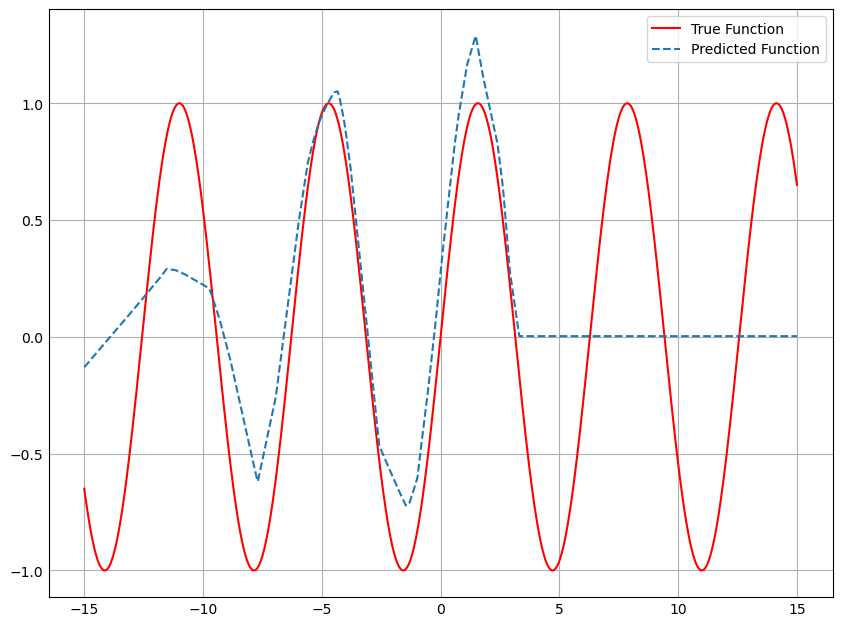

In [11]:
test_plot()

# Where did we go wrong?
Why did it flatline? The reality is that with only about a hundred parameters, it couldn't predict the entire section, so it chose to just be very good at the beginning part. In the future, we could increase the start and stop, add more data points, change the number of layers/parameters, and try a higher/lower learning rate, but this was really just a proof of concept. You now understand most of machine learning! Everything else is really just a fancy way of using a universal function approximator!  
If you liked this, that's great! You have a future in machine learning! If you didn't, that's still ok, because you may not really see the practical application yet. I hope you will read the next tutorial, on classifying handwritten digits, for a real world example of how great Machine Learning can be. Imagine writing a program to classify digits all by yourself! Impossible!